In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
import random

In [11]:
M = 0.25
Q = np.array([[13,12,-2],[12,17,6],[-2,6,12]])
I = np.array([[1,0,0],[0,1,0],[0,0,1]])
A = Q-M*I
print(A)
results = la.eig(A)
print("eigenvalues: ",results[0])
#print("eigenvectors: \n",results[1])


[[12.75 12.   -2.  ]
 [12.   16.75  6.  ]
 [-2.    6.   11.75]]
eigenvalues:  [2.76481495e+01+0.j 8.93881445e-03+0.j 1.35929116e+01+0.j]


In [13]:
M = 28
Q = np.array([[13,12,-2],[12,17,6],[-2,6,12]])
I = np.array([[1,0,0],[0,1,0],[0,0,1]])
A = Q-M*I
print(A)
results = la.eig(A)
print("eigenvalues: ",results[0])
#print("eigenvectors: \n",results[1])

[[-15  12  -2]
 [ 12 -11   6]
 [ -2   6 -16]]
eigenvalues:  [ -0.10185046+0.j -27.74106119+0.j -14.15708836+0.j]


In [18]:
q = np.array([-22,-14.5,13])
xopt = -np.matmul(np.linalg. inv(Q),q)
c=-1
def f(x, Q, q,c):
    res = 0.5*np.matmul(x.transpose(), np.matmul(Q,x))+np.matmul(q.transpose(),x)+c
    return res
fopt = f(xopt,Q,q,c)
fopt

-23.885000000000005

In [25]:
def update(xk,Q,q,k,stepSize):
    def grad(x):
        return np.matmul(Q,x)+q
    return xk - stepSize(k)*grad(xk)
def stepSize(k,eta=1/28):
    return eta

In [38]:
def run():
    n_steps = 30
    xk = np.array([0,0,0])
    fx1 = []
    xk1 = np.copy(xk)
    tList = list(range(n_steps))
    for i in tList:
        xk1 = update(xk1,Q,q,i+1,stepSize)
        fx1.append(f(xk1, Q, q,c)-fopt)
    plt.plot(tList,fx1)
    plt.xlabel("t")
    plt.ylabel("f(x_t)-f(x*)")
    plt.legend(["stepSize1"])
    plt.xlim([0,5])
    return Q,q,xk


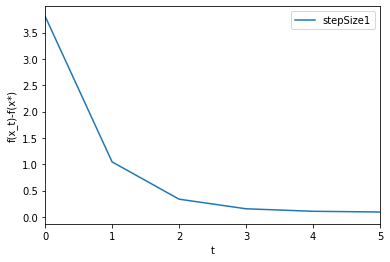

In [39]:
 Q,q,xk = run()

In [52]:
def update2(xk,Q,q,k):
    eta = 1
    alpha = 0.4
    beta = 0.5
    def grad(x):
        return np.matmul(Q,x)+q
    d = grad(xk)
    while f(xk-eta*d,Q,q,c)>f(xk,Q,q,c) - alpha*eta*np.matmul(d.transpose(),xk):
        eta = eta*beta
    
    return xk - eta*grad(xk)
def run2():
    n_steps = 30
    xk = np.array([0,0,0])
    fx1 = []
    xk1 = np.copy(xk)
    tList = list(range(n_steps))
    for i in tList:
        xk1 = update2(xk1,Q,q,i+1)
        fx1.append(f(xk1, Q, q,c)-fopt)
    plt.plot(tList,fx1)
    plt.xlabel("t")
    plt.ylabel("f(x_t)-f(x*)")
    plt.legend(["stepSize2"])
    plt.xlim([0,5])
    return Q,q,xk

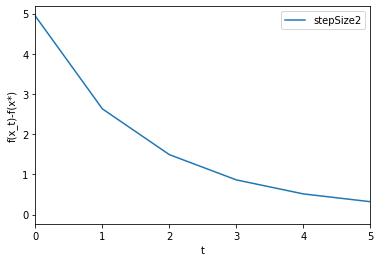

In [53]:
 Q,q,xk = run2()

In [57]:
A = np.array([[-2,0],[0,-1]])
B = np.array([[-2,0],[0,-4]])
t = 0.8
f = t*A+(1-t)*B
x = t*(-2)+(1-t)*(-4)
f,x

(array([[-2. ,  0. ],
        [ 0. , -1.6]]),
 -2.4)

In [58]:
A, B

(array([[-2,  0],
        [ 0, -1]]),
 array([[-2,  0],
        [ 0, -4]]))